#  Data Science

## Notebook 1. (introduction, explanatory analysis, web scraping)

### IPython

* IPython command shell for interactive computing in multiple programming languages, originally developed for Python.
* Powerful interactive shells (terminal and Qt-based).
* A browser-based notebook with support for code, text, mathematical expressions, inline plots and rich media.
* Support for interactive data visualization and use of GUI toolkits.
* Flexible, embeddable interpreters to load into one's own projects.

### Useful packages

#### SciPy - A collection of packages:

* NumPy - N-dimenional arrays
* SciPy library - scientific computing
* Matplotlib - for plotting
* Sympy - symbolic math
* pandas - data analysis

In [50]:
from IPython.display import Image, display
from IPython.display import HTML

In [51]:
%%capture --no-display
HTML('<iframe src=http://www.scipy.org/ width=1000 height=350></iframe>')

#### Scikit- learn - machine learning in Python

In [52]:
%%capture --no-display
HTML('<iframe src=http://scikit-learn.org/stable/ width=1000 height=400></iframe>')

### Data formats

#### Possible data formats

* Lists, dictionaries
* NumPy arrays
* DataFrame objects from Pandas package
* ...

Scikit-learn, Pandas, NumPy and Matplotlib are all interlinked and work well together.

Transferring between data formats is not always so trivial!

#### Simple lists

In [53]:
data1 = [1,2,3]

In [54]:
data1

[1, 2, 3]

## Numpy array

* an N-dimensional array
* fast, flexible container for large data sets in Python

Numpy documentation: https://docs.scipy.org/doc/numpy-dev/user/index.html

Numpy cheat sheet

In [55]:
%%capture --no-display
HTML('<iframe src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf width=1000 height=400></iframe>')

In [56]:
import numpy as np

In [57]:
!pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable


In [58]:
array1 = np.array(data1)

In [59]:
array1

array([1, 2, 3])

Multidimensional arrays

In [60]:
array2 = np.array([[1,2,3],[2,3,4]])

In [61]:
array2

array([[1, 2, 3],
       [2, 3, 4]])

### Indexing

In [62]:
array3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Fetch row

In [63]:
array3[2]

array([7, 8, 9])

<span style="color:red">How can I fetch the value 5 from the array above?</span>

In [64]:
array3[2][0]

7

In [65]:
array3[2,0]

7

Fetch columns

In [66]:
array3[:,0]

array([1, 4, 7])

Detailed description about arrays:

http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html

http://docs.scipy.org/doc/numpy/reference/arrays.html

### Data types

* Different attributes may have different types
* Numpy (and pandas) will infer the type if none is specified
* Incompatible types will lead to errors

In [67]:
array4 = np.array([1.25, 'hello', 42])
array4

array(['1.25', 'hello', '42'], dtype='<U32')

U32 is a 32 character unicode string

In [68]:
array5 = np.array([1, 2, 3, 4, 5])
array5.dtype

dtype('int32')

Numpy infers reasonable data types. For example, a string cannot be interpretted as an int but an int can be interpretted as a string. Information is lost when you cast a float as an int but not vice versa.

<span style="color:red">What data type will numpy infer if I make one number a float, a string?</span>

In [69]:
type(array5)

numpy.ndarray

In [70]:
type(array5[0])

numpy.int32

The data type can be set globally

In [71]:
np.array([ 3, -1, -2, 0, 12.1, 10], dtype='int32')

array([ 3, -1, -2,  0, 12, 10])

In [72]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.unicode_)
numeric_strings

array(['1.25', '-9.6', '42'], dtype='<U4')

Type casting in python and numpy

In [73]:
float(numeric_strings[0])

1.25

In [74]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

<span style="color:red">Why is it important to be aware of data types?</span>

In [75]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.unicode_)
floats = np.array([0, 3.6, 15.5], dtype=float)
numeric_strings[0] + floats[2]

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

Overview of numpy data types:

http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

Pandas extends many numpy data types

### Structured arrays

In [76]:
structured_array = np.array([(1, 2.0, 'Hello'), (2, 3.0, 'World')],dtype=[('col0', '>i4'), ('col1', '>f4'), ('col2', '|U10')])
structured_array

array([(1, 2., 'Hello'), (2, 3., 'World')],
      dtype=[('col0', '>i4'), ('col1', '>f4'), ('col2', '<U10')])

In [77]:
structured_array['col0']

array([1, 2])

We have two records of three features:
32-bit integer, 32-bit floating point number, 10-character string

### Import data from file to NumPy array

In [78]:
from io import StringIO   # StringIO behaves like a file object

In [79]:
d = StringIO('M 21 72\n F 35 58\n F 55 66')
dat = np.loadtxt(d, dtype={'names': ('gender', 'age', 'weight'),
                     'formats': ('S1', 'i4', 'f4')})
dat

array([(b'M', 21, 72.), (b'F', 35, 58.), (b'F', 55, 66.)],
      dtype=[('gender', 'S1'), ('age', '<i4'), ('weight', '<f4')])

The function np.loadtxt works in byte mode, in Python 2 this is the default string type. On the other hand, Python 3 uses unicode, and denotes byte-strings by b.

Selecting columns

In [80]:
dat['gender']

array([b'M', b'F', b'F'], dtype='|S1')

In [81]:
dat[['gender','weight']]

array([(b'M', 72.), (b'F', 58.), (b'F', 66.)],
      dtype={'names':['gender','weight'], 'formats':['S1','<f4'], 'offsets':[0,5], 'itemsize':9})

In [82]:
c = StringIO("1,0,2\n3,0,4")
x = np.loadtxt(c, delimiter=',', usecols=(0,2))
x

array([[1., 2.],
       [3., 4.]])

### Importing data from local files

Importing data from file, we should pay attention to the access path of the file.

We have to know in which folder the notebook is running and where is the file.

Instead of absolute path, it is better to use relative paths, for more details [see here](https://www.computerhope.com/issues/ch001708.htm).

* . : is the current directory

* .. :  is the parent of the current directory.

* / or \: is the root of the current drive

While doing the homework problems you should also use relative pathways while importing files, mimicking the folder structure given in this notebook.

In [83]:
import sys
f = open("../Data/bank.csv",'r')
bank_data = np.loadtxt(f, dtype={'names': ('age', 'sex', 'region', 'income', 'married', 'children', 'car','save_acct', 'current_acct', 'mortgage', 'pep'),
                                 'formats': ('i', 'S6', 'S10', 'f', 'S3', 'i2', 'S3', 'S3', 'S3', 'S3', 'S3')})
bank_data[0:10]

FileNotFoundError: [Errno 2] No such file or directory: '../Data/bank.csv'

#### Attributes of bank dataset

* age: age of customer in years (numeric)
* sex: MALE / FEMALE
* region: inner_city/rural/suburban/town
* income: income of customer (numeric)
* married: is the customer married (YES/NO)
* children: number of children (numeric)
* car: does the customer own a car (YES/NO)
* save_acct: does the customer have a saving account (YES/NO)
* current_acct: does the customer have a current account (YES/NO)
* mortgage: does the customer have a mortgage (YES/NO)
* pep: did the customer buy a PEP (Personal Equity Plan) after the last mailing (YES/NO)

#### A little visualization

In [84]:
x = bank_data['age']
y = bank_data['income']

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

plt.scatter(x,y)
plt.xlabel('age (years)')
plt.ylabel('income (dollars)')
plt.show()

NameError: name 'bank_data' is not defined

Matplotlib documentation:
    
https://matplotlib.org/

Matplotlib cheat sheet

In [85]:
%%capture --no-display
HTML('<iframe src=https://matplotlib.org/cheatsheets/cheatsheets.pdf width=1000 height=400></iframe>')

### Pandas

* A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects
* One column of a DataFrame is a pandas series object. A series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index

Pandas cheat sheet

In [86]:
%%capture --no-display
HTML('<iframe src=https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf width=1000 height=400></iframe>')

In [87]:
import pandas as pd

#### 3 MoviLens data files:
* demographic information about the users (includes "user_id")
* movie ratings (includes "user_id" and "movie_id")
* information about the movies (includes "movie_id")

Load the users data, using pandas read_csv() function. There is also read_json(), read_excel(), etc.

We can take a look at the data file in the url.

<span style="color:red">What's the delimiter in this file?</span>

In [88]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head(10)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [89]:
users.columns

Index(['user_id', 'age', 'sex', 'occupation', 'zip_code'], dtype='object')

You can see that pandas implements numpy behind the scenes, leveraging numpy's array computation capabilities. You can also easily move between pandas and numpy:

In [90]:
numpy_users = users.to_numpy()
numpy_users

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [91]:
pd.DataFrame(numpy_users)

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [92]:
users.shape
len(users)

943

Load movie ratings data

In [93]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Load data about the movies

In [94]:
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Some basic information about the data

In [95]:
print(movies.dtypes)
print(movies.describe())

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object
          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


In [96]:
movies.drop(labels='video_release_date',axis=1,inplace=True)
movies.head(2)

,movie_id,title,release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...


Pandas users the same type casting syntax as numpy

In [97]:
movies['title'] = movies['title'].astype(str)
type(movies.at[0,'title']) 

str

Pandas extends the numpy "datetime64" data type

In [98]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

#### Selecting, filtering, visualizing the data

In [99]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Indexing into dataframe

In [100]:
# two ways to select a column
users_col = users['occupation']
users.occupation.head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [101]:
type(users_col)

pandas.core.series.Series

In [102]:
users_col.to_list()
users_col.to_numpy()

array(['technician', 'other', 'writer', 'technician', 'other',
       'executive', 'administrator', 'administrator', 'student', 'lawyer',
       'other', 'other', 'educator', 'scientist', 'educator',
       'entertainment', 'programmer', 'other', 'librarian', 'homemaker',
       'writer', 'writer', 'artist', 'artist', 'engineer', 'engineer',
       'librarian', 'writer', 'programmer', 'student', 'artist',
       'student', 'student', 'administrator', 'homemaker', 'student',
       'student', 'other', 'entertainment', 'scientist', 'engineer',
       'administrator', 'librarian', 'technician', 'programmer',
       'marketing', 'marketing', 'administrator', 'student', 'writer',
       'educator', 'student', 'programmer', 'executive', 'programmer',
       'librarian', 'none', 'programmer', 'educator', 'healthcare',
       'engineer', 'administrator', 'marketing', 'educator', 'educator',
       'student', 'student', 'student', 'engineer', 'engineer',
       'scientist', 'administrator', 'st

In [103]:
columns_you_want = ['occupation', 'sex']
users[columns_you_want].head()

,occupation,sex
0,technician,M
1,other,F
2,writer,M
3,technician,M
4,other,F


In [104]:
# select a single value, .loc and .iloc are two indexing methods
users.at[0,'occupation']

'technician'

In [105]:
# select a row
users.loc[0,:]

user_id                1
age                   24
sex                    M
occupation    technician
zip_code           85711
Name: 0, dtype: object

Plotting with pandas

Notice that pandas implements matplotlib behind the scenes too, so you can use commands such as plt.title() in combination with your pandas plots

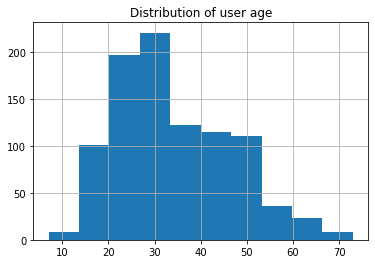

In [106]:
users.age.hist()
plt.title('Distribution of user age')
plt.show()

Selecting a slice of the dataframe based on certain criteria

In [107]:
users_over_25 = users[users.age > 25]
users_over_25.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


In [108]:
users[(users.age == 40) & (users.sex == 'M')].head()

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629


Use these techniques to answer questions such as, whats the average age of female programmers in this dataset?

In [109]:
# select users who are both female and programmers
selected_users = users[(users.sex == 'F') & 
                       (users.occupation == 'programmer')]

# show statistic summary
print(selected_users.describe())

# or use the build in mean() function
print(selected_users.age.mean())
print(selected_users['age'].mean())

          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000
32.166666666666664
32.166666666666664


##### Split-apply-combine

* Splitting the data into groups based on some criteria.
* Applying a function to each group independently.
* Combining the results into a data structure.

##### Average rating of users 

In [110]:
user_mean = ratings.groupby(['user_id'])['rating'].mean() #or sum(), count(), median(), etc.
user_mean.head()

user_id
1    3.610294
2    3.709677
3    2.796296
4    4.333333
5    2.874286
Name: rating, dtype: float64

<span style="color:red">How many rows are there in "user_mean"?</span>
<span style="color:red">How many rows would there be if I grouped by "movie_id" instead?</span>

In [111]:
len(user_mean)
len(movies)

1682

Another way using the apply() method to apply a function

<span style="color:red">What does x refer to?</span>

<span style="color:red">Why is this syntax useful?</span>

In [112]:
movie_mean = ratings.groupby(['movie_id'])['rating']
average_ratings = movie_mean.apply(lambda x: x.mean())
average_ratings.head()

movie_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64

What is the highest rated movie?

In [113]:
average_ratings.sort_values(ascending = False)[0:9]

movie_id
814     5.0
1599    5.0
1201    5.0
1122    5.0
1653    5.0
1293    5.0
1500    5.0
1189    5.0
1536    5.0
Name: rating, dtype: float64

In [114]:
# search df based on single value
movies[movies['movie_id']==814]

,movie_id,title,release_date,imdb_url
813,814,"Great Day in Harlem, A (1994)",1994-01-01,http://us.imdb.com/M/title-exact?Great%20Day%2...


In [115]:
# another way, use pd.merge() to join to dataframes

print(type(average_ratings))
avg_ratings_df = pd.DataFrame(average_ratings)
merged = movies.merge(avg_ratings_df, on='movie_id')
merged.sort_values(by='rating', ascending=False).head()

<class 'pandas.core.series.Series'>


,movie_id,title,release_date,imdb_url,rating
813,814,"Great Day in Harlem, A (1994)",1994-01-01,http://us.imdb.com/M/title-exact?Great%20Day%2...,5.0
1598,1599,Someone Else's America (1995),1996-05-10,http://us.imdb.com/M/title-exact?Someone%20Els...,5.0
1200,1201,Marlene Dietrich: Shadow and Light (1996),1996-04-02,http://us.imdb.com/M/title-exact?Marlene%20Die...,5.0
1121,1122,They Made Me a Criminal (1939),1939-01-01,http://us.imdb.com/M/title-exact?They%20Made%2...,5.0
1652,1653,Entertaining Angels: The Dorothy Day Story (1996),1996-09-27,http://us.imdb.com/M/title-exact?Entertaining%...,5.0


## Web Scraping

- Urllib: the most basic webscraping package 
- BeautifulSoup: Lightning fast static web page processing
- Selenium: To manipulate, test and scrape dynamic HTML web pages. It is able to use the elements of the user interface, for example fill in forms, check the checkboxes and so on...

**Strategy:** 
1. Extract the data from the dynamic html with Selenium 
2. Turn the data into a beautiful soup object to process the html with BeautifulSoup.

**Be careful and fair (copyright, license, media law, server overloading, etc.)!**
- the robots.txt file, generally located at the root of a website, communicates to webcrawlers about what is off limits to scrape, protecting their intellectual property
- it is not a legal requirement but a widely used convention

For web scraping we should have a basic understanding of HTML tags!

## HTML, just the basics 

### Tags, Elements, Attributes

Learn more about HTML

https://www.w3schools.com/html/html_basic.asp

#### Most of the time when we scrape html pages we locate the information by it's tags and attributes. The most important tags in this manner are id and class.

### DOM tree (Document Object Model)

![DomTree0](https://media.licdn.com/dms/image/C4D22AQH_rjlNORWwqQ/feedshare-shrink_2048_1536/0/1676362097908?e=1679529600&v=beta&t=xeHCbIrxWWkZ3Me-PiRuIA74GImkuTN1wyLN02VUPTw)

![DomTree](https://media.licdn.com/dms/image/C4D22AQGc3tTlAY6x7Q/feedshare-shrink_2048_1536/0/1676362027964?e=1679529600&v=beta&t=Uf0oElJllBNmQv6N1XvtDzQrsAlhDlN36E7yIoEuPbY)

#### The inner HTML of  the elements are of the same nature as the whole html page. We can use the same methods to locate an information for example in a div as we do in the html. 

### Scraping static webpages using Beautifulsoup and Urllib

**Reading an entire webpage as a string using Urllib**

In [116]:
# the website we will scrape first
# %%capture --no-display
HTML('<iframe src=https://www.crummy.com/software/BeautifulSoup/ width=1000 height=400></iframe>')

C:\Users\rahul\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [117]:
    from urllib.request import urlopen

url = 'https://www.crummy.com/software/BeautifulSoup/'
source = urlopen(url).read().decode('utf-8') # read in html and decode bytes into string
print(source)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>		   

<img align="right" src="10.1.jpg" width="250"><br />

<p>[

The scraped contents of the url are just a string so you can use all of the python string manipulation methods you're familiar with like find(), count() and replace()

In [118]:
## count occurences of 'Soup'
print(type(source))
print(source.count('Soup'))

<class 'str'>
50


In [119]:
## find index of 'Reddit uses Beautiful Soup'
position =  source.find('Reddit uses Beautiful Soup')
print(position)

7608


In [120]:
# test to see the substring
print(source[position:position + len('Reddit uses Beautiful Soup')])

Reddit uses Beautiful Soup


In [121]:
import bs4 #this is beautiful soup

soup = bs4.BeautifulSoup(source, "lxml") # lxml is the parser library
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ 

In [122]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [123]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [124]:
header = soup.find('h1') # or .find_all() to get a list of all h1 headers
header

<h1>Beautiful Soup</h1>

In [125]:
header.text

'Beautiful Soup'

<span style="color:red">How would I extract just the first paragraph?</span>

In [126]:
# how to find all of a tag
soup.findAll('a')

[<a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="enterprise.html">For enterprise</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG">Changelog</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a href="https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&amp;utm_medium=referral&amp;utm_campaign=enterprise" target="_blank">
 <span class="cta">
   Beautiful Soup for enterprise available via Tidelift
  </span>
 </a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion
 gr

In [127]:
links = soup.find_all('a')
a_link = links[10]
print(a_link)
a_link.get('href') # search within one tag for a specific attribute

<a href="http://code.google.com/p/html5lib/">html5lib</a>


'http://code.google.com/p/html5lib/'

In [128]:
# store all links on the page in a list
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['#Download',
 'bs4/doc/',
 '#HallOfFame',
 'enterprise.html',
 'https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'bs4/download/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'zine/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.2.tar.gz',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_sourc

In [129]:
# extract all external links
external_links = []

# the loop filters out "None" and links that don't start with http
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'ht

In [130]:
# the same this using list comprehension

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'https://tidelift.com/security',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/BlankerL/DXY-COVID-19-Crawler',
 'ht

### Scraping dynamic webpages using Selenium

In [131]:
%%capture --no-display
HTML('<iframe src=https://www.worldometers.info/coronavirus/weekly-trends/ width=1000 height=400></iframe>')

What if we need information on the weekly case/death change? - Our robot must click on the Columns dropdown menu and select the required columns. We need another package called Selenium to this end.

In [132]:
!pip install selenium

Defaulting to user installation because normal site-packages is not writeable


In [145]:
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import time

#from selenium.webdriver.chrome.options import Options
#chrome_options = Options()
#chrome_options.add_argument("--headless")

#from selenium.webdriver.common.by import By
#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC

1. Open the website

In [146]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get('https://www.worldometers.info/coronavirus/weekly-trends/')

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 110.0.5481
[WDM] - Get LATEST chromedriver version for 110.0.5481 google-chrome
[WDM] - Driver [C:\Users\rahul\.wdm\drivers\chromedriver\win32\110.0.5481.77\chromedriver.exe] found in cache


If this doesn't work for you, heres another way to open the website. You'll first have to install a Web Driver, for example Google Chrome:

https://chromedriver.chromium.org/downloads 

Make sure to download the version that matches the current version of your chrome browser! Store the webdriver .exe file somewhere you can access it with a relative file path.

In [147]:
%%capture --no-display
driver = webdriver.Chrome('../Data/chromedriver/chromedriver') # chromedriver is an .exe file, depending on your computer you may have to specify this file extension
driver.get('https://www.worldometers.info/coronavirus/weekly-trends/')

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


2. Select the dropdown menu

In [148]:
from selenium.webdriver.common.by import By

element = driver.find_element(By.CLASS_NAME,'dropdown-toggle')
print(element.text) # '.text' identifies whats on the website so check to make sure it's right

Columns


3. Click on the dropdown menu

In [151]:
element = driver.find_element(By.CLASS_NAME,'dropdown-toggle')

time.sleep(2) # pause to ensure that the website has fully opened, sometimes selenium is too fast
element.click()
time.sleep(2)

element = driver.find_element(By.ID,'colsDrop')
element.text

'Cases in the last 7 days\nCases in the preceding 7 days\nWeekly Case % Change\nCases in the last 7 days/1M pop\nDeaths in the last 7 days\nDeaths in the preceding 7 days\nWeekly Death % Change\nDeaths in the last 7 days/1M pop\nWeekly Case Change\nWeekly Case Change/1M pop\nWeekly Deaths Change\nWeekly Deaths Change/1M pop\nPopulation'

In [152]:
element.get_attribute('innerHTML')

'\n\n            <li><div class="checkbox"><label for="column_2"><input id="column_2" checked="" type="checkbox" class="toggle-vis" data-column="2">Cases in the last 7 days</label></div></li><li><div class="checkbox"><label for="column_3"><input id="column_3" checked="" type="checkbox" class="toggle-vis" data-column="3">Cases in the preceding  7 days</label></div></li><li><div class="checkbox"><label for="column_4"><input id="column_4" checked="" type="checkbox" class="toggle-vis" data-column="4"><nobr>Weekly Case</nobr> <nobr>% Change</nobr></label></div></li><li><div class="checkbox"><label for="column_5"><input id="column_5" checked="" type="checkbox" class="toggle-vis" data-column="5">Cases in the last <nobr>7 days</nobr>/1M pop</label></div></li><li><div class="checkbox"><label for="column_6"><input id="column_6" checked="" type="checkbox" class="toggle-vis" data-column="6">Deaths in the last <nobr>7 days</nobr></label></div></li><li><div class="checkbox"><label for="column_7"><in

4. Click the checkboxes

In [153]:
element1 = element.find_element(By.ID, 'column_11')
element2 = element.find_element(By.ID, 'column_13')

driver.execute_script("arguments[0].click();", element1)
driver.execute_script("arguments[0].click();", element2)

5. Download the source

In [155]:
window_after = driver.window_handles[-1] #Change the current window to the latest one opened if necessary 
driver.switch_to.window(window_after)

source = driver.page_source

We need a pandas data frame with the countires and their weekly case change and death change. Let's process the html source / data with BeautifulSoup.

In [156]:
soup = BeautifulSoup(source)

In [157]:
soup.prettify

<bound method Tag.prettify of <html lang="en"><!--<![endif]--><head><script src="https://m.addthis.com/live/red_lojson/300lo.json?si=63fc95f470861907&amp;bkl=0&amp;bl=1&amp;pdt=557&amp;sid=63fc95f470861907&amp;pub=ra-54615fa823b2af68&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.worldometers.info&amp;fp=coronavirus%2Fweekly-trends%2F&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1677497856495&amp;jsl=4097&amp;uvs=63fc95f4d2f5e967000&amp;skipb=1&amp;callback=addthis.cbs.jsonp__60031129107400320" type="text/javascript"></script><script src="https://v1.addthisedge.com/live/boost/ra-54615fa823b2af68/_ate.track.config_resp" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202302130101/reactive_library_fy2021.js"></script><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=www.worldometer

In [158]:
# arguments: tag, {attribute: value}
table = soup.find('table', {'id':'main_table_countries_today'})
table

<table class="table table-bordered table-hover main_table_countries dataTable no-footer" id="main_table_countries_today" style="width: 100%; margin-top: 0px !important;">
<thead>
<tr role="row"><th aria-label="#" class="sorting_disabled" colspan="1" rowspan="1" style="width: 14.3333px;" width="1%">#</th><th aria-controls="main_table_countries_today" aria-label="Country,Other: activate to sort column ascending" class="sorting" colspan="1" rowspan="1" style="width: 100.333px;" tabindex="0" width="100">Country,<br/>Other</th><th aria-controls="main_table_countries_today" aria-label="Cases in the last 7 days: activate to sort column ascending" aria-sort="descending" class="sorting_desc" colspan="1" rowspan="1" style="width: 40.3333px;" tabindex="0" width="30">Cases in the last 7 days</th><th aria-controls="main_table_countries_today" aria-label="Cases in the preceding  7 days: activate to sort column descending" class="sorting" colspan="1" rowspan="1" style="width: 70.3333px;" tabindex="0"

In [159]:
rows = table.find_all('tr', {'role':'row'})
rows[0] # use .text to understand what part of the site it is

<tr role="row"><th aria-label="#" class="sorting_disabled" colspan="1" rowspan="1" style="width: 14.3333px;" width="1%">#</th><th aria-controls="main_table_countries_today" aria-label="Country,Other: activate to sort column ascending" class="sorting" colspan="1" rowspan="1" style="width: 100.333px;" tabindex="0" width="100">Country,<br/>Other</th><th aria-controls="main_table_countries_today" aria-label="Cases in the last 7 days: activate to sort column ascending" aria-sort="descending" class="sorting_desc" colspan="1" rowspan="1" style="width: 40.3333px;" tabindex="0" width="30">Cases in the last 7 days</th><th aria-controls="main_table_countries_today" aria-label="Cases in the preceding  7 days: activate to sort column descending" class="sorting" colspan="1" rowspan="1" style="width: 70.3333px;" tabindex="0" width="30">Cases in the preceding  7 days</th><th aria-controls="main_table_countries_today" aria-label="Weekly Case % Change: activate to sort column descending" class="sorting"

In [160]:
rows[100]

<tr class="even" role="row" style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">93</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="/coronavirus/country/bosnia-and-herzegovina/">Bosnia and Herzegovina</a></td>
<td class="sorting_1" style="font-weight: bold; text-align:right">48</td>
<td style="font-weight: bold; text-align:right">55</td>
<td style="font-weight: bold; text-align:right">-13%</td>
<td style="font-weight: bold; text-align:right">15</td>
<td style="font-weight: bold; text-align:right">11</td>
<td style="font-weight: bold; text-align:right">6</td>
<td style="font-weight: bold; text-align:right">+83%</td>
<td style="font-weight: bold; text-align:right">3</td>
<td style="font-weight: bold; text-align:right">-2</td><td style="font-weight: bold; text-align:right">+2</td><td style="font-weight: bold; text-align:right">3,249,317</td>
<td data-continent="Europe" style="display:none">Europe</td>
</tr>

In [161]:
countries=[]

for row in rows:
    countries.append(row.find('a', {'class':'mt_a'}))
    
countries

[None,
 None,
 None,
 None,
 None,
 <a class="mt_a" href="/coronavirus/country/us/">USA</a>,
 <a class="mt_a" href="/coronavirus/country/germany/">Germany</a>,
 <a class="mt_a" href="/coronavirus/country/taiwan/">Taiwan</a>,
 <a class="mt_a" href="/coronavirus/country/japan/">Japan</a>,
 <a class="mt_a" href="/coronavirus/country/russia/">Russia</a>,
 <a class="mt_a" href="/coronavirus/country/south-korea/">S. Korea</a>,
 None,
 <a class="mt_a" href="/coronavirus/country/austria/">Austria</a>,
 <a class="mt_a" href="/coronavirus/country/brazil/">Brazil</a>,
 <a class="mt_a" href="/coronavirus/country/france/">France</a>,
 None,
 <a class="mt_a" href="/coronavirus/country/italy/">Italy</a>,
 <a class="mt_a" href="/coronavirus/country/poland/">Poland</a>,
 <a class="mt_a" href="/coronavirus/country/australia/">Australia</a>,
 <a class="mt_a" href="/coronavirus/country/chile/">Chile</a>,
 <a class="mt_a" href="/coronavirus/country/mexico/">Mexico</a>,
 <a class="mt_a" href="/coronavirus/c

In [162]:
countries=list(filter(lambda x: x != None, countries))
countries

[<a class="mt_a" href="/coronavirus/country/us/">USA</a>,
 <a class="mt_a" href="/coronavirus/country/germany/">Germany</a>,
 <a class="mt_a" href="/coronavirus/country/taiwan/">Taiwan</a>,
 <a class="mt_a" href="/coronavirus/country/japan/">Japan</a>,
 <a class="mt_a" href="/coronavirus/country/russia/">Russia</a>,
 <a class="mt_a" href="/coronavirus/country/south-korea/">S. Korea</a>,
 <a class="mt_a" href="/coronavirus/country/austria/">Austria</a>,
 <a class="mt_a" href="/coronavirus/country/brazil/">Brazil</a>,
 <a class="mt_a" href="/coronavirus/country/france/">France</a>,
 <a class="mt_a" href="/coronavirus/country/italy/">Italy</a>,
 <a class="mt_a" href="/coronavirus/country/poland/">Poland</a>,
 <a class="mt_a" href="/coronavirus/country/australia/">Australia</a>,
 <a class="mt_a" href="/coronavirus/country/chile/">Chile</a>,
 <a class="mt_a" href="/coronavirus/country/mexico/">Mexico</a>,
 <a class="mt_a" href="/coronavirus/country/new-zealand/">New Zealand</a>,
 <a class="

In [163]:
for row in range(len(countries)):
    countries[row] = countries[row].text
    
countries

['USA',
 'Germany',
 'Taiwan',
 'Japan',
 'Russia',
 'S. Korea',
 'Austria',
 'Brazil',
 'France',
 'Italy',
 'Poland',
 'Australia',
 'Chile',
 'Mexico',
 'New Zealand',
 'Greece',
 'Czechia',
 'Serbia',
 'Belgium',
 'Spain',
 'Costa Rica',
 'Romania',
 'Israel',
 'Moldova',
 'Lithuania',
 'Cyprus',
 'Slovenia',
 'Guatemala',
 'Bahrain',
 'Canada',
 'Indonesia',
 'Malaysia',
 'Netherlands',
 'Iran',
 'Switzerland',
 'India',
 'South Africa',
 'Lebanon',
 'Bolivia',
 'Georgia',
 'Paraguay',
 'Hong Kong',
 'Hungary',
 'Philippines',
 'UAE',
 'Colombia',
 'Montenegro',
 'Peru',
 'Slovakia',
 'Kuwait',
 'Qatar',
 'Brunei ',
 'Zambia',
 'Armenia',
 'Bulgaria',
 'Saudi Arabia',
 'Sweden',
 'Panama',
 'Denmark',
 'Cameroon',
 'Estonia',
 'Uruguay',
 'Mozambique',
 'Zimbabwe',
 'Norway',
 'Pakistan',
 'Trinidad and Tobago',
 'Barbados',
 'Finland',
 'Thailand',
 'Tunisia',
 'Azerbaijan',
 'Guadeloupe',
 'Afghanistan',
 'Nauru',
 'North Macedonia',
 'Latvia',
 'Kazakhstan',
 'Ethiopia',
 'Viet

Which other columns do we need?

In [164]:
list(map(lambda x: x.text, rows[0].find_all('th'))) # map() applies a function to each element of an iterable

['#',
 'Country,Other',
 'Cases in the last 7 days',
 'Cases in the preceding  7 days',
 'Weekly Case % Change',
 'Cases in the last 7 days/1M pop',
 'Deaths in the last 7 days',
 'Deaths in the preceding 7 days',
 'Weekly Death % Change',
 'Deaths in the last 7 days/1M pop',
 'Weekly Case Change/1M pop',
 'Weekly Deaths Change/1M pop',
 'Population',
 'Continent']

In [ ]:
rows=table.find_all('tr', {'role':'row'})
countries=[]
weekly_case_change=[]
weekly_death_change=[]

for row in rows:
    try:
        countries.append(row.find('a', {'class':'mt_a'}).text)
        weekly_case_change.append(row.find_all('td')[-4].text)
        weekly_death_change.append(row.find_all('td')[-3].text)
    except:
        continue

In [ ]:
import pandas as pd

df = pd.DataFrame({'Countries':countries, 'Weekly_Case_Change':weekly_case_change, 'Weekly_Death_Change':weekly_death_change})
df

In [ ]:
df['Weekly_Case_Change']=df['Weekly_Case_Change'].apply(lambda x: float(x.replace(',','')))

In [ ]:
df['Weekly_Death_Change']=df['Weekly_Death_Change'].apply(lambda x: float(x.replace(',','')))

IMPORTANT: Don't scrape the data from the website over and over (server overload), instead save a datafile to your personal computer

In [ ]:
df.to_csv('../Data/covid_scrape.csv')

In [ ]:
df = pd.read_csv('../Data/covid_scrape.csv')
df.drop(labels=['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)
df.head()

### Some plotting

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = df.sort_values(by='Weekly_Case_Change', ascending=False)
df.head()

In [ ]:
plt.figure(dpi=100)
plt.barh(df.Countries[0:5], df.Weekly_Case_Change[0:5])
plt.xlabel('Weekly_Case_Change')
plt.show()

In [ ]:
df = df.sort_values(by='Weekly_Death_Change', ascending=False)
df.head()

In [ ]:
plt.figure(dpi=100)
plt.barh(df.head().Countries, df.head().Weekly_Death_Change)
plt.xlabel('Weekly_Death_Change')
plt.show()

In [ ]:
plt.figure(dpi=100)
plt.scatter(df.Weekly_Case_Change, df.Weekly_Death_Change)
plt.xlabel('Weekly Case Change')
plt.ylabel('Weekly Death Change')
plt.show()

In [ ]:
plt.figure(dpi=100)
plt.scatter(df.Weekly_Case_Change, df.Weekly_Death_Change)
plt.xlabel('Weekly Case Change')
plt.ylabel('Weekly Death Change')
plt.xlim([-1000, 1000])
plt.ylim([-50, 50])
plt.show()